In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
train_df = pd.read_csv('Q1_train.csv')
test_df = pd.read_csv('Q1_test.csv')

In [3]:
# printing train and test dataset shapes
print("train dataframe shape: ", train_df.shape)
print("test dataframe shape: ", test_df.shape)

train dataframe shape:  (909, 5)
test dataframe shape:  (461, 5)


In [4]:
# looking at the first 5 rows of the train and test datasets
print("train df head: ", train_df.head())
print("test df head: ", test_df.head())

train df head:      3.6216  8.6661  -2.8073  -0.44699  0
0  4.54590  8.1674  -2.4586  -1.46210  0
1  3.86600 -2.6383   1.9242   0.10645  0
2  3.45660  9.5228  -4.0112  -3.59440  0
3  0.32924 -4.4552   4.5718  -0.98880  0
4  4.36840  9.6718  -3.9606  -3.16250  0
test df head:     3.8644   3.7061  0.70403  0.35214  0
0  1.2999  2.57620  2.01070 -0.18967  0
1  2.0051 -6.86380  8.13200 -0.24010  0
2  4.9294  0.27727  0.20792  0.33662  0
3  2.8297  6.34850 -0.73546 -0.58665  0
4  2.5650  8.63300 -2.99410 -1.30820  0


In [5]:
# separating Features (X) and Labels (y)
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

In [6]:
# to make sure the shapes are correct
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (909, 4)
y_train shape: (909,)
X_test shape: (461, 4)
y_test shape: (461,)


In [7]:
k_values = [i for i in range(1, 10)]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}: Accuracy={acc:.16f}")

K=1: Accuracy=1.0000000000000000
K=2: Accuracy=1.0000000000000000
K=3: Accuracy=1.0000000000000000
K=4: Accuracy=1.0000000000000000
K=5: Accuracy=1.0000000000000000
K=6: Accuracy=1.0000000000000000
K=7: Accuracy=1.0000000000000000
K=8: Accuracy=1.0000000000000000
K=9: Accuracy=1.0000000000000000


In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [9]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training set
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')  # You can change K value
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores)}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0


<module 'matplotlib.pyplot' from 'c:\\Users\\mehdih\\AppData\\Local\\anaconda3\\envs\\geospatialEnv\\lib\\site-packages\\matplotlib\\pyplot.py'>

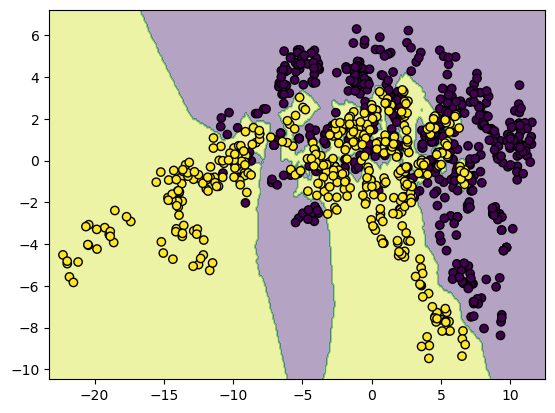

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Fit KNN on the reduced data
knn.fit(X_train_2d, y_train)

# Create a mesh grid for visualization
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for the grid to visualize the boundary
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the boundary and training points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, marker='o', edgecolor='k')
plt
